## 0. IMPORT PACKAGES

In [1]:
# when starting a line with ! in jupyter notebook, the code is executed in the terminal instead of python
# so packages can be installed this way (uncomment the line by removing the # to actually run it)
#!pip3 install pandas

In [2]:
import pandas as pd # this is a standard convention, pd is used as an alias for pandas
import seaborn as sns # seaborn is useful because it has many example datasets

## 1. LOAD A DATAFRAME

In [3]:
# load a dataframe from seaborn
taxis = sns.load_dataset('taxis')

# in real life, data will mostly come from a database, an S3 bucket or from a csv file hosted locally or online. 
# here's how to open a csv file in pandas:
other_df = pd.read_csv("https://raw.githubusercontent.com/massardier/proj/main/rossman_store.csv")

# host a csv file on github: https://www.youtube.com/watch?v=81IoRUm_AMk&t=1s

## 2. HIGH LEVEL EXPLORATION OF A DATAFRAME

In [229]:
# select the first 3 rows of a dataframe:
taxis.head(3)

# note that the outcome of the last executable row of a jupyter notebook cell is automatically printed 
# below the cell without having to use "print()"

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [230]:
# select the last 3 rows of a dataframe:
taxis.tail(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [231]:
# Have a quick look at the statistics for each column with the method: .describe()
taxis.describe(include='all')

# for numeric values, it shows the distribution: average, median, quantiles, max, min
# for categorical values like text columns, it shows the number of unique values (unique), the most frequent (top), 
# and the frequency of the most common (freq)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,6414,6425,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,2019-03-19 14:40:14,2019-03-04 18:08:13,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,NaN,NaN,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN


## 3. PREPARE A DATAFRAME

In [244]:
# 3.1 standardize the column names 
# (columns are already standardized for the taxi dataframe, it's here just for the example)
taxis.columns = taxis.columns.str.lower() # lower case 
taxis.columns = taxis.columns.str.replace(" ","_") # replace the spaces with an underscore

In [245]:
# 3.2 treat the time columns:
# tell python that a column must be treated as time 
taxis['pickup'] = pd.to_datetime(taxis['pickup']) 
taxis['dropoff'] = pd.to_datetime(taxis['dropoff']) 

# extract information from the time column:
taxis['pickup_date'] = taxis.pickup.dt.date # extract the date
taxis['pickup_hour'] = taxis.pickup.dt.hour # the hour
taxis['pickup_dow'] = taxis.pickup.dt.weekday # the day of week
taxis['ride_duration'] = taxis.dropoff - taxis.pickup # calculate the ride duration
taxis['ride_duration_in_sec'] = taxis.ride_duration.dt.seconds

taxis[['pickup','pickup_date','pickup_hour','pickup_dow','ride_duration','ride_duration_in_sec']].head(3)

,pickup,pickup_date,pickup_hour,pickup_dow,ride_duration,ride_duration_in_sec
0,2019-03-23 20:21:09,2019-03-23,20,5,0 days 00:06:15,375
1,2019-03-04 16:11:55,2019-03-04,16,0,0 days 00:07:05,425
2,2019-03-27 17:53:01,2019-03-27,17,2,0 days 00:07:24,444


In [286]:
# 3.3 fill the missing data with something. 

# first, identify the columns with missing data
print(">>> MISSING DATA COUNT:\n", taxis.isnull().sum(axis = 0))

# second, ask: why is the data missing? do all the rows with missing data have something in common?
# for example: are all the rows without pickup_zone rides that started outside of the city?
# sometimes the fact that there is missing data is, per se, an information.

# if no time to really fix the issue, possible solutions are either:
# drop the rows with nas: 
taxis.dropna(inplace=False) # using inplace=False, because it's just an example

# replace the NAs with some text:
taxis.fillna("unknown", inplace = False) # using inplace=False, because it's just an example

# or replace the NAs with the columns's most frequent value (it's called the mode).
# (for numeric variables, it is typical to use the mean or the median instead)
most_frequent_values = taxis.mode().iloc[0]
taxis.fillna(most_frequent_values, inplace = True)

print(">>> MISSING DATA COUNT AFTER FILLING:\n", taxis.isnull().sum(axis = 0))

# with more time, a regression can be used to use the pickup_zone of rows with similar fares and duration for eg.

>>> MISSING DATA COUNT:
 pickup                  0
dropoff                 0
passengers              0
distance                0
fare                    0
tip                     0
tolls                   0
total                   0
color                   0
payment                 0
pickup_zone             0
dropoff_zone            0
pickup_borough          0
dropoff_borough         0
pickup_date             0
pickup_hour             0
pickup_dow              0
ride_duration           0
ride_duration_in_sec    0
dtype: int64
>>> MISSING DATA COUNT AFTER FILLING:
 pickup                  0
dropoff                 0
passengers              0
distance                0
fare                    0
tip                     0
tolls                   0
total                   0
color                   0
payment                 0
pickup_zone             0
dropoff_zone            0
pickup_borough          0
dropoff_borough         0
pickup_date             0
pickup_hour             0
pickup_dow   

In [273]:
# 3.4 sort the dataframe:

# sort by pickup_zone, and then, whithin the pickup_zones, by fare
taxis.sort_values(['pickup_zone', 'fare'], ascending=[True,False]).head()[['pickup_zone','fare']]

# the ascending argument means that the pickup_zone are sorted alphabetically (ascending = True), 
# and the fares are sorted from big to small (ascending = False)

,pickup_zone,fare
5981,Allerton/Pelham Gardens,54.16
5988,Allerton/Pelham Gardens,10.50
508,Alphabet City,28.50
2944,Alphabet City,18.50
1599,Alphabet City,16.00


In [372]:
# 3.5 merge 2 dataframes

# creating 2 dataframe with a common column to make an example of merge (a zone is smaller than a borough)

rides_per_zone = taxis.groupby(['pickup_borough','pickup_zone'])['pickup'].count().rename("zone_rides").reset_index()
rides_per_borough = taxis.groupby(['pickup_borough'])['pickup'].count().rename("borough_rides").reset_index()

rides_per_zone_and_borough = pd.merge(rides_per_zone, rides_per_borough, on =['pickup_borough'], how = 'left')

# how = 'left' means that all the rows in the left df are kept. in this example, all the borough
# in the left df are also in the right df so there will be no borough missing in the right one, but that's 
# not always the case, and using how = 'left' ensure that the rows that would contain nan are not eliminated

rides_per_zone_and_borough['zone_rides_as_share_of_borough_rides'] = rides_per_zone_and_borough.zone_rides/rides_per_zone_and_borough.borough_rides
rides_per_zone_and_borough.sort_values("zone_rides", ascending = False)

,pickup_borough,pickup_zone,zone_rides,borough_rides,zone_rides_as_perc_of_borough_rides
120,Manhattan,Midtown Center,256,5294,0.048357
137,Manhattan,Upper East Side South,211,5294,0.039856
126,Manhattan,Penn Station/Madison Sq West,210,5294,0.039668
92,Manhattan,Clinton East,208,5294,0.039290
121,Manhattan,Midtown East,198,5294,0.037401
...,...,...,...,...,...
3,Bronx,Bronx Park,1,99,0.010101
26,Bronx,Spuyten Duyvil/Kingsbridge,1,99,0.010101
118,Manhattan,Marble Hill,1,5294,0.000189
149,Queens,Bayside,1,657,0.001522


In [377]:
# 3.6 concatenate 2 dataframes (bind them)

rides_in_manhattan = taxis.query("pickup_borough == 'Manhattan'")
rides_in_bronx = taxis.query("pickup_borough == 'Bronx'")
pd.concat([rides_in_manhattan,rides_in_bronx]).head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_hour,pickup_dow,ride_duration,ride_duration_in_sec
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20,5,0 days 00:06:15,375
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16,0,0 days 00:07:05,425
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17,2,0 days 00:07:24,444
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,1,6,0 days 00:25:52,1552
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,13,5,0 days 00:09:32,572


In [386]:
# 3.7 remove duplicates

# remove any duplicated pickup_date
taxis.sort_values('pickup').drop_duplicates(subset = ['pickup_date'])[['pickup_date','pickup']].head()

# the argument subset allows us to deduplicate the pickup_date

,pickup_date,pickup
6203,2019-02-28,2019-02-28 23:29:03
884,2019-03-01,2019-03-01 00:03:29
1449,2019-03-02,2019-03-02 00:05:57
3841,2019-03-03,2019-03-03 00:12:50
2179,2019-03-04,2019-03-04 00:14:46


In [384]:
# 3.8 retrieve the frequency of each value in a column

taxis.pickup_hour.value_counts()
# the hour when least rides start is 5 am

18    417
19    406
17    388
20    368
14    360
21    355
16    336
12    334
15    330
10    325
22    321
9     319
13    316
8     313
23    296
11    295
7     221
0     205
6     142
1     110
2     101
3      67
4      57
5      51
Name: pickup_hour, dtype: int64

In [391]:
# 3.9 rolling average

# df1['column1'].rolling(7).mean() # get a 7 days rolling average of the values in the column1

pax_per_day = taxis.groupby('pickup_date')[['passengers']].sum()
pax_per_day['7days_avg']=pax_per_day.rolling(7).mean()
pax_per_day.head(10)

,passengers,7days_avg
pickup_date,,
2019-02-28,1,NaN
2019-03-01,370,NaN
2019-03-02,310,NaN
2019-03-03,264,NaN
2019-03-04,267,NaN
2019-03-05,382,NaN
2019-03-06,390,283.428571
2019-03-07,331,330.571429
2019-03-08,332,325.142857


In [399]:
# 3.10 something that can be very confusing: copying a dataframe

# here python creates a separate object taxi_manhattan because it is only certain rows of the dataframe taxis
taxi_manhattan = taxis.query("pickup_borough == 'Manhattan'")

taxi_manhattan2 = taxi_manhattan # this line instead doesn't make a copy of the data frame taxi_manhattan, it only
# allows to access the object taxi_manhattan with 2 different names: taxi_manhattan and taxi_manhattan2.
# for this reason it will trigger a warning

# if something is modified on taxi_manhattan2, like here
taxi_manhattan2['pickup_borough'] = 'M'
# it will be modified on taxi_manhattan as well, eg:
print("taximahattan:", taxi_manhattan.pickup_borough.unique())

taximahattan: ['M']


<ipython-input-399-a48682044d66>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_manhattan2['pickup_borough'] = 'M'


In [400]:
# in order to have python make actual copy of the dataframe, the method .copy() can be used

taxi_manhattan = taxis.query("pickup_borough == 'Manhattan'")

taxi_manhattan3 = taxi_manhattan.copy()
# taxi_manhattan3 is a separate object, stored elsewhere on the computer's disk. modifying taxi_manhattan3
# will not do anything to taxi_mahattan 

taxi_manhattan3['pickup_borough'] = 'M'
# it will be modified on taxi_manhattan as well, eg:
print("taximahattan:", taxi_manhattan.pickup_borough.unique())

taximahattan: ['Manhattan']


14.9


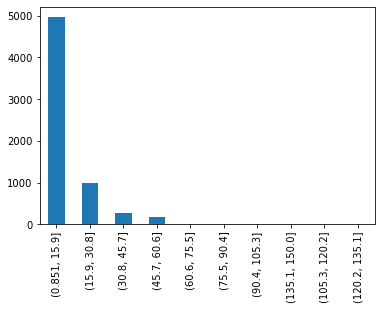

In [37]:
# 3.11 Create bins, cuts, buckets of values

# go from a continuous to a categorical variable: segment a numeric variable in intervals.

# automatically split the values in the column fare in 10 blocks
pd.cut(taxis.fare,10).value_counts().plot.bar() # the size of a block is calculated as follow:

# (highest fare - lowest fare) /100
print((taxis.fare.max()-taxis.fare.min())/10)

# The first interval has this form: (0.851, 15.9] because the first number 0.851 is included, and the last 
# number 15.9 is excluded (that's why the following interval starts with 15.9)

<AxesSubplot:>

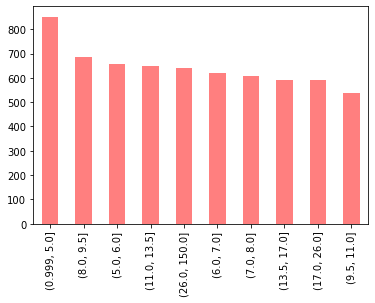

In [38]:
# automatically split the values in the column fare in 10 groups of similar size
pd.qcut(taxis.fare,10).value_counts().plot.bar(color='red',alpha=0.5)

<AxesSubplot:>

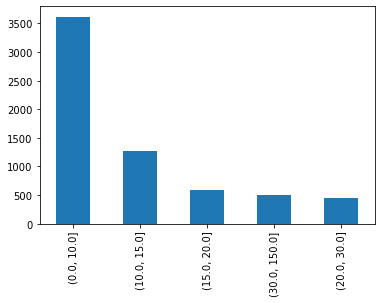

In [45]:
# create bins with intervals manually defined
my_bins = pd.IntervalIndex.from_tuples([(0,10),(10,15),(15, 20), (20, 30), (30,taxis.fare.max())])

# split the values in the column fare using my custom intervals
pd.cut(taxis.fare,my_bins).value_counts().plot.bar()


In [60]:
# 3.12 get the rank of each of the rides for each pickup_zone in terms of fare

taxis['ride_rank'] = taxis.groupby('pickup_zone').fare.rank(method = 'min', ascending=False)
# ascending = False because we want the highest fare to be ranked #1 and method = 'min' so that 2 rides
# with the same fare both obtain the same rank, the rank of the first ride found with this fare.
taxis[taxis['ride_rank']==1].head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,rank,ride_rank
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,Midtown South,JFK Airport,Manhattan,Queens,95.5,1.0
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn,172.0,1.0
250,2019-03-21 10:07:48,2019-03-21 10:52:02,2,16.74,52.0,15.26,5.76,76.32,yellow,credit card,East Chelsea,JFK Airport,Manhattan,Queens,95.5,1.0
269,2019-03-03 21:34:24,2019-03-03 22:08:25,2,7.80,28.0,6.35,0.00,38.15,yellow,credit card,Greenwich Village North,Central Harlem,Manhattan,Manhattan,469.5,1.0
283,2019-03-22 11:55:00,2019-03-22 12:36:56,2,16.60,52.0,6.00,5.76,67.06,yellow,credit card,Midtown Center,JFK Airport,Manhattan,Queens,95.5,1.0


In [4]:
# 3.13 other useful pandas function

# df['column1'].apply(lambda x: x**2) # apply a function to a pandas column

# df.sample(100) # randomly select x rows of a dataframe

# df['column1'].map({'cat': 'kitten', 'dog': 'puppy'}) # replace the content in the cells using the mapping provided

# df.drop(labels=['test'], axis=1) #delete the columns in the list

# df.sum() # sums across rows (with axis = 0) or across columns (with axis = 1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


## 4. FILTER ROWS AND COLUMNS

In [401]:
# 4.1 Filtering columns

# filtering a df is called indexing. it is done by using square brackets [] after the dataframe's name.
# between the square brackets goes the list of columns to be kept. 
# example filtering 2 columns: passengers and distance.

# the structure is: dataframe[list_of_column_names]
taxis[['passengers','distance']].head(3) 

,passengers,distance
0,1,1.60
1,1,0.79
2,1,1.37


In [350]:
# 4.2 Filter rows:
# The quickest way to filter a df: the .query() method

taxis.query("distance >10 & color == 'yellow' & pickup_zone in ['JFK Airport', 'East Chelsea']").head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_hour,pickup_dow,ride_duration,ride_duration_in_sec
53,2019-03-20 18:49:24,2019-03-20 19:12:40,1,13.45,42.00,0.0,0.00,37.80,yellow,cash,JFK Airport,Sunnyside,Queens,Queens,2019-03-20,18,2,0 days 00:23:16,1396
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,58.00,0.0,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan,2019-03-05,17,1,0 days 00:48:25,2905
127,2019-03-21 18:44:03,2019-03-21 19:30:50,1,10.21,37.61,0.0,0.00,38.41,yellow,credit card,East Chelsea,Marble Hill,Manhattan,Manhattan,2019-03-21,18,3,0 days 00:46:47,2807


In [355]:
# 4.3 More complex filtering is done with booleans

# It also makes code more readable and professional.

long_distance_mask = (taxis.distance > 20)
short_distance_mask = (taxis.distance < 2)
# these boolean filters are called "mask" because they hide part of the data and leave the rest visible like
# the old masks that cover only the eyes and not the rest of the face

# they can be combined (adding ~ in front of a boolean returns the opposite of the boolean)
medium_distance_taxis_rides = taxis[~long_distance_mask & ~short_distance_mask] # this is neither long distance nor short
medium_distance_taxis_rides.distance.describe()[['min','max']]

min     2.00
max    19.99
Name: distance, dtype: float64

In [356]:
# note that filtering columns is done with dataframe[list_of_column_names]
# the structure is similar when filtering rows, but instead of a list, boolean is used: dataframe[boolean]
# and pandas understands that what needs to be filtered is the rows, not the columns, thanks to the 
# type of the object: boolean or list

In [357]:
# 4.4 The optimal way to index: .loc[]

# It's a method but it uses square brackets [] instead of round ones () like the other methods
# the reason is probably that it is a method made for indexing and indexing is usually made with []

# It is useful for several reasons:

# It allows to filter both rows and columns with a mask and a list of column names at the same time:
# The structure is dataframe.loc[boolean,list_of_column_names]

taxis.loc[long_distance_mask,['fare','tip']].head()

,fare,tip
814,58.0,15.26
1051,58.0,11.05
1384,73.5,0.00
1451,52.0,15.26
1535,52.0,2.00


In [404]:
# It allows to modify the content of the dataframe for some specific rows. 

# For example if there is an extra fee of $3 for any ride coming from an airport 
# but it was not included in the data, it can be corrected with .loc[]

# 1. create a mask for the rows that contain the word airport or Airport
mask_ride_from_airport = taxis.pickup_zone.str.lower().str.contains('[Aa]irport').fillna(False)

# 2. check that the mask pics up the right rows
print(taxis[mask_ride_from_airport].pickup_zone.unique())

# 3. show that it doesn't work without .iloc[]: add $3 to these rows
print("avg fare before correction",taxis[mask_ride_from_airport]['fare'].mean())

taxis[mask_ride_from_airport]['fare'] += 3

# proof that it didn't work.a warning recommends to use .loc[] instead:
print("avg fare after correction is the same",taxis[mask_ride_from_airport]['fare'].mean())

['LaGuardia Airport' 'JFK Airport']
avg fare before correction 49.60962962962963
avg fare after correction is the same 49.60962962962963


<ipython-input-404-a88434133203>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis[mask_ride_from_airport]['fare'] += 3


In [405]:
# with .iloc[] it works without problem
taxis.loc[mask_ride_from_airport,'fare'] += 3 

print("avg fare after correction has the extra  $3",taxis[mask_ride_from_airport]['fare'].mean())

avg fare after correction has the extra  $3 52.60962962962963


In [282]:
# There's another method similar to .loc[], for which numbers are used to index instead. 
# It is called .iloc[]


# Eg. Get the first 3 rows and the fist 5 columns of the dataframe. 
# The row number 0 is the first one, and that the selection excludes the last number 
# ie: row number 3, the 4th row, is not included
taxis.iloc[0:3,0:5]

,pickup,dropoff,passengers,distance,fare
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5


## 5. AGGREGATE DATA

Example:
* number of passengers who traveled per day
* the distance they covered in total
* the distance they covered on average

How a .groupby() method works:

![groupby2>](groupby2.png)

In [283]:
# Group by with a single aggregation function (here, the sum) applied to 2 columns
taxis.groupby(['pickup_date'])[['passengers','distance']].sum().head(3)

,passengers,distance
pickup_date,,
2019-02-28,1,0.90
2019-03-01,370,640.29
2019-03-02,310,548.70


In [413]:
# Group by with different functions for different columns

# 1. make a dictionary that contains the columns to process and the functions to be applied to each of them:
aggregation_dict = {"passengers":"sum","distance":["sum","mean"]}

# 2. use it in the groupby call
simplified_taxis = taxis.groupby(['pickup_date']).agg(aggregation_dict)

simplified_taxis.head(3)

passengers distance          
                   sum      sum      mean
pickup_date                              
2019-02-28           1     0.90  0.900000
2019-03-01         370   640.29  2.656805
2019-03-02         310   548.70  2.771212

## 6. HOW TO REMOVE THE INDEX

In [414]:
# Several pandas functions turn columns into indices.

# In the previous aggregation, given that there are 2 functions for "distance": sum and mean, pandas created a 
# column multi-index (2 layers, one for the metric, one for the function) and accessing the columns by 
# name becomes tricky. 
print("a multi index with 2 levels is made of a list of pairs:\n\n",
      simplified_taxis.columns)

# Here's how to flatten a column multi-index:

simplified_taxis.columns = ["__".join(pair) for pair in simplified_taxis.columns]
# 2 underscores are inserted between the metric name (passengers, distance) and the function name (sum, mean)

simplified_taxis.head(3)

a multi index with 2 levels is made of a list of pairs:

 MultiIndex([('passengers',  'sum'),
            (  'distance',  'sum'),
            (  'distance', 'mean')],
           )


,passengers__sum,distance__sum,distance__mean
pickup_date,,,
2019-02-28,1,0.90,0.900000
2019-03-01,370,640.29,2.656805
2019-03-02,310,548.70,2.771212


In [277]:
# Any column inside the groupby() function will become an index. 

# Here's how to turn row indices back into columns:
simplified_taxis.reset_index(inplace=True)
simplified_taxis.head(3)

,pickup_date,passengers__sum,distance__sum,distance__mean
0,2019-02-28,1,0.90,0.900000
1,2019-03-01,370,640.29,2.656805
2,2019-03-02,310,548.70,2.771212


## ANNEX 1: MORE TRANSFORMATIONS WITH PANDAS

![long to wide>](long_to_wide.png)

In [56]:
simplified_taxis = taxis.groupby(['pickup_date','color','payment'])[['passengers','distance','tip']].sum()
simplified_taxis.reset_index(inplace=True)
simplified_taxis.head(3)

,pickup_date,color,payment,passengers,distance,tip
0,2019-02-28,green,cash,1,0.90,0.00
1,2019-03-01,green,cash,28,30.23,0.00
2,2019-03-01,green,credit card,35,125.04,32.08


In [60]:
simplified_taxis_wide = pd.pivot_table(data=simplified_taxis,
                                       index = ['pickup_date'], 
                                       columns = ['payment','color'], #the columns whose data will become column name
                                       values=['passengers','tip']) #the columns whose data is numeric and will be aggegrated

# remove the multi index
simplified_taxis_wide.columns = ["__".join(reversed(pair)).replace(" ","_").lower() for pair in simplified_taxis_wide.columns]

simplified_taxis_wide.head()

,green__cash__passengers,yellow__cash__passengers,green__credit_card__passengers,yellow__credit_card__passengers,green__cash__tip,yellow__cash__tip,green__credit_card__tip,yellow__credit_card__tip
pickup_date,,,,,,,,
2019-02-28,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2019-03-01,28.0,76.0,35.0,229.0,0.0,0.0,32.08,410.39
2019-03-02,18.0,68.0,16.0,206.0,0.0,0.0,19.57,314.40
2019-03-03,19.0,48.0,26.0,170.0,0.0,0.0,40.73,266.74
2019-03-04,15.0,56.0,22.0,174.0,0.0,0.0,8.70,326.28


![wide_to_long>](wide_to_long.png)

In [61]:
simplified_taxis_long = pd.melt(simplified_taxis_wide.reset_index(), 
        id_vars=['pickup_date'], 
        value_vars=['green__cash__passengers', 'yellow__cash__passengers'])

simplified_taxis_long.head()

,pickup_date,variable,value
0,2019-02-28,green__cash__passengers,1.0
1,2019-03-01,green__cash__passengers,28.0
2,2019-03-02,green__cash__passengers,18.0
3,2019-03-03,green__cash__passengers,19.0
4,2019-03-04,green__cash__passengers,15.0


In [89]:
# split the values in the 'variable' column into several columns:

simplified_taxis_long['color'],simplified_taxis_long['payment'],simplified_taxis_long['value_type']=simplified_taxis_long['variable'].str.split("__").str

simplified_taxis_long.head(3)

<ipython-input-89-2fbc14533abc>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  simplified_taxis_long['color'],simplified_taxis_long['payment'],simplified_taxis_long['value_type']=simplified_taxis_long['variable'].str.split("__").str


,pickup_date,variable,value,color,payment,value_type
0,2019-02-28,green__cash__passengers,1.0,green,cash,passengers
1,2019-03-01,green__cash__passengers,28.0,green,cash,passengers
2,2019-03-02,green__cash__passengers,18.0,green,cash,passengers


## ANNEX 2: MAKE THE TABLE EASY TO READ

In [285]:
simplified_taxis = taxis.groupby(['pickup_date']).agg({"passengers":"sum","distance":"mean","fare":"mean"})

simplified_taxis_short = simplified_taxis.tail(10)

# rename columns to ensure that anyone can understand what data is presented,
# even if it's the first time they see it.
simplified_taxis_short.rename(columns = {"distance":"avg_distance_in_km","fare":"avg_fare"}, inplace=True)

# list of common format for styled tables. dec means decimals.
format_dict = {"percentage2dec":"{:.2%}",
              "percentage0dec":"{:.0%}",
              "dollar2dec":'${:,.2f}',
              "euro2dec":'{:,.2f}€',
              "number2dec":"{:.2f}"}

s = simplified_taxis_short.style
s = s.format({"avg_distance_in_km":format_dict["number2dec"],"avg_fare":format_dict["dollar2dec"]}) # let's keep only 2 decimals for distance and fare
s.bar(subset=['avg_distance_in_km'], align= 'left', color=['steelblue'])
s.bar(subset=['avg_fare'], align= 'left', color=['goldenrod'])
s

# the rows without bars are the ones with the smallest numbers. align = 'mid' would change that

/home/julien.massardier/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,passengers,avg_distance_in_km,avg_fare
pickup_date,,,
2019-03-22,348,2.90,$13.43
2019-03-23,340,2.45,$11.49
2019-03-24,252,2.91,$12.56
2019-03-25,234,3.20,$13.18
2019-03-26,266,3.06,$13.46
2019-03-27,352,3.18,$13.84
2019-03-28,327,2.99,$13.77
2019-03-29,312,2.66,$12.85
2019-03-30,359,3.11,$13.18
